In [ ]:
!unzip -qq "/content/drive/MyDrive/Alzheimer.zip의 사본"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt


In [6]:
train_datagen = ImageDataGenerator(rescale=1./225,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1
                                   )

In [7]:
train_generator = train_datagen.flow_from_directory(
    "/content/data-ch20-master/train",
    target_size = (150,150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 160 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    "/content/data-ch20-master/test",
    target_size = (150,150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [9]:
### CNN

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [11]:
model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.Adam(learning_rate=0.0002),
              metrics = ["accuracy"])

In [13]:
hist = model.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 10
)

Epoch 1/100
32/32 [==============================] - 14s 40ms/step - loss: 0.7072 - accuracy: 0.4437 - val_loss: 0.6804 - val_accuracy: 0.5400
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 0.6880 - accuracy: 0.5813 - val_loss: 0.6813 - val_accuracy: 0.5600
Epoch 3/100
32/32 [==============================] - 2s 62ms/step - loss: 0.6703 - accuracy: 0.6250 - val_loss: 0.6465 - val_accuracy: 0.5400
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.6631 - accuracy: 0.5875 - val_loss: 0.6722 - val_accuracy: 0.4400
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.6400 - accuracy: 0.6750 - val_loss: 0.5974 - val_accuracy: 0.8200
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.5754 - accuracy: 0.7688 - val_loss: 0.5811 - val_accuracy: 0.6200
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.5573 - accuracy: 0.6687 - val_loss: 0.4523 - val_accuracy: 0.8400
Epoch

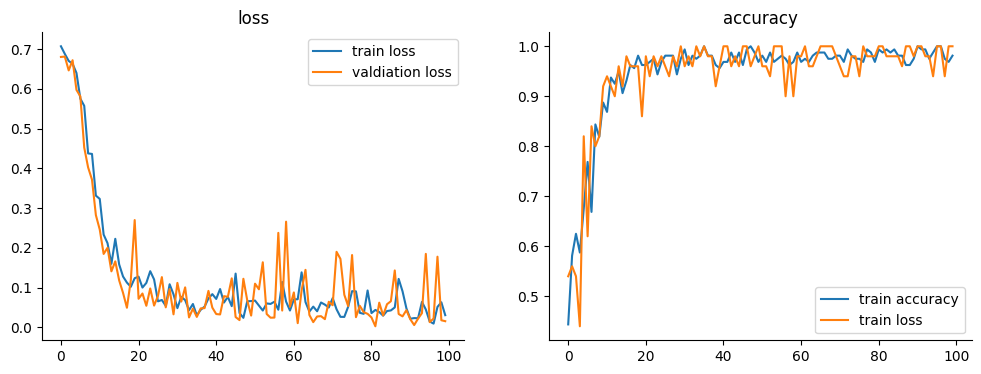

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12 ,4))

sns.lineplot(x = range(len(hist.history["loss"])),
             y = hist.history["loss"], ax = axes[0],
             label = "train loss")

sns.lineplot(x = range(len(hist.history["loss"])),
             y = hist.history["val_loss"], ax = axes[0],
             label = "valdiation loss")

sns.lineplot(x = range(len(hist.history["accuracy"])),
             y = hist.history["accuracy"], ax = axes[1],
             label = "train accuracy")

sns.lineplot(x = range(len(hist.history["accuracy"])),
             y = hist.history["val_accuracy"], ax = axes[1],
             label = "train loss")

axes[0].set_title("loss")
axes[1].set_title("accuracy")

sns.despine()
plt.show()


In [16]:
## transfer learning

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


In [18]:
transfer_model = VGG16(weights="imagenet", include_top=False,
                       input_shape = (150, 150, 3))

transfer_model.trainable = False
transfer_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [19]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation("relu"))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation("sigmoid"))
finetune_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 activation_6 (Activation)   (None, 1)                

In [21]:
finetune_model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.Adam(learning_rate=0.0002),
              metrics = ["accuracy"])

hist = finetune_model.fit(
    train_generator,
    epochs = 20,
    validation_data = test_generator,
    validation_steps =10
)

Epoch 1/20
32/32 [==============================] - 4s 48ms/step - loss: 0.6521 - accuracy: 0.6375 - val_loss: 0.6115 - val_accuracy: 0.6000
Epoch 2/20
32/32 [==============================] - 1s 41ms/step - loss: 0.5068 - accuracy: 0.7688 - val_loss: 0.4116 - val_accuracy: 0.8600
Epoch 3/20
32/32 [==============================] - 2s 48ms/step - loss: 0.3781 - accuracy: 0.8687 - val_loss: 0.3527 - val_accuracy: 0.9400
Epoch 4/20
32/32 [==============================] - 2s 69ms/step - loss: 0.3437 - accuracy: 0.8875 - val_loss: 0.3142 - val_accuracy: 0.9000
Epoch 5/20
32/32 [==============================] - 2s 60ms/step - loss: 0.3195 - accuracy: 0.8875 - val_loss: 0.3579 - val_accuracy: 0.8800
Epoch 6/20
32/32 [==============================] - 1s 42ms/step - loss: 0.2794 - accuracy: 0.9062 - val_loss: 0.2461 - val_accuracy: 0.9600
Epoch 7/20
32/32 [==============================] - 1s 41ms/step - loss: 0.2499 - accuracy: 0.9375 - val_loss: 0.2350 - val_accuracy: 0.9400
Epoch 8/20
32

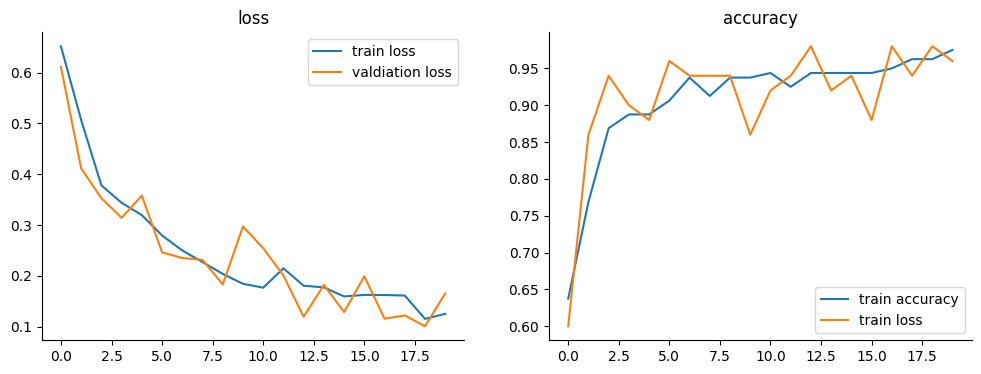

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12 ,4))

sns.lineplot(x = range(len(hist.history["loss"])),
             y = hist.history["loss"], ax = axes[0],
             label = "train loss")

sns.lineplot(x = range(len(hist.history["loss"])),
             y = hist.history["val_loss"], ax = axes[0],
             label = "valdiation loss")

sns.lineplot(x = range(len(hist.history["accuracy"])),
             y = hist.history["accuracy"], ax = axes[1],
             label = "train accuracy")

sns.lineplot(x = range(len(hist.history["accuracy"])),
             y = hist.history["val_accuracy"], ax = axes[1],
             label = "train loss")

axes[0].set_title("loss")
axes[1].set_title("accuracy")

sns.despine()
plt.show()